# $$ Wine \ Quality \ Analysis $$

## Introduction
- In this project, we will analyze a dataset containing physicochemical properties of wines along with their quality ratings. The goal is to perform exploratory data analysis (EDA), identify patterns, and potentially build predictive models to predict wine quality based on its attributes.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler, PowerTransformer
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'Major Project Dataset (Wine Classification).xlsx')

In [3]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
287,7.5,0.40,0.12,3.0,0.092,29.0,53.0,0.99670,3.52,0.70,10.3,6.0
751,8.3,0.65,0.10,2.9,0.089,17.0,40.0,0.99803,3.52,0.55,9.5,5.0
869,7.6,0.63,0.03,2.0,0.080,27.0,43.0,0.99578,3.52,0.64,10.9,6.0
831,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.52,0.77,11.1,6.0
1459,7.9,0.20,0.35,1.7,0.054,7.0,15.0,0.99458,3.52,0.80,11.9,7.0
374,14.0,0.41,0.63,3.8,0.089,6.0,47.0,1.00140,3.52,0.81,10.8,6.0
439,7.0,0.62,0.18,1.5,0.062,7.0,50.0,0.99510,3.52,0.60,9.3,5.0
904,6.8,0.59,0.06,6.0,0.060,11.0,18.0,0.99620,3.52,0.59,10.8,7.0
1404,8.0,0.50,0.39,2.6,0.082,12.0,46.0,0.99850,3.52,0.62,10.7,6.0
269,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.52,0.97,10.1,6.0


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


### Dataset Description
- **1.Fixed Acidity:** Represents the amount of non-volatile acids in the wine,
- **2.Volatile Acidity:** Measures the amount of acetic acid in the wine
- **3.Citric Acid:** Indicates the presence of citric acid in the wine
- **4.Residual Sugar:** Describes the amount of sugar remaining in the wine after fermentation
- **5.Chlorides:** Represents the amount of salt in the wine
- **6.Free Sulfur Dioxide:** Measures the free form of SO2 present in the wine
- **7.Total Sulfur Dioxide:** Represents the total amount of SO2 present in the wine
- **8.Density:** Describes the density of the wine
- **9.pH:** Indicates the acidity or basicity of the wine on a scale from 0 to 14
- **10.Sulphates:** Represents the amount of sulphates in the wine
- **11.Alcohol:** Indicates the alcohol content of the wine
- **12.Quality:** Represents the quality of the wine on a scale from 3 to 8


In [6]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis=1, inplace=True)
df.dropna(inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1596.0,8.321366,1.742121,4.60000,7.1000,7.900000,9.200000,15.90000
volatile_acidity,1596.0,0.527666,0.179154,0.12000,0.3900,0.520000,0.640000,1.58000
citric_acid,1596.0,0.271128,0.194847,0.00000,0.0900,0.260000,0.420000,1.00000
residual_sugar,1596.0,2.536936,1.408341,0.90000,1.9000,2.200000,2.600000,15.50000
chlorides,1596.0,0.087487,0.047107,0.01200,0.0700,0.079000,0.090000,0.61100
free_sulfur_dioxide,1596.0,15.882206,10.467380,1.00000,7.0000,14.000000,21.000000,72.00000
total_sulfur_dioxide,1596.0,46.431078,32.893072,6.00000,22.0000,38.000000,62.000000,289.00000
density,1596.0,0.996745,0.001889,0.99007,0.9956,0.996745,0.997842,1.00369
ph,1596.0,3.498716,0.080297,2.74000,3.5200,3.520000,3.520000,3.90000
sulphates,1596.0,0.658189,0.169587,0.33000,0.5500,0.620000,0.730000,2.00000


In [8]:
def value_counts(data):
    for columns in data.columns:
        print('--'*10,columns,'--'*10)
        print(data[columns].unique(),'\n')

In [9]:
value_counts(df)

-------------------- fixed_acidity --------------------
[ 7.4  7.8 11.2  7.9  7.3  6.7  7.5  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5] 

-------------------- volatile_acidity --------------------
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.6

In [10]:
def num_univarient(data):
    for columns in data.columns:
        print('-'*10,columns,'-'*10)
        print(df[columns].agg(['min','max','mean','std','skew','kurt']),'\n')

In [11]:
num_univarient(df)

---------- fixed_acidity ----------
min      4.600000
max     15.900000
mean     8.321366
std      1.742121
skew     0.980459
kurt     1.125792
Name: fixed_acidity, dtype: float64 

---------- volatile_acidity ----------
min     0.120000
max     1.580000
mean    0.527666
std     0.179154
skew    0.673646
kurt    1.226240
Name: volatile_acidity, dtype: float64 

---------- citric_acid ----------
min     0.000000
max     1.000000
mean    0.271128
std     0.194847
skew    0.318011
kurt   -0.790318
Name: citric_acid, dtype: float64 

---------- residual_sugar ----------
min      0.900000
max     15.500000
mean     2.536936
std      1.408341
skew     4.558503
kurt    28.818877
Name: residual_sugar, dtype: float64 

---------- chlorides ----------
min      0.012000
max      0.611000
mean     0.087487
std      0.047107
skew     5.674724
kurt    41.632387
Name: chlorides, dtype: float64 

---------- free_sulfur_dioxide ----------
min      1.000000
max     72.000000
mean    15.882206
std     10

In [12]:
def calculate_outliers(data):
    total_per_mv = ((data.isnull().sum().sum() / data.size) * 100).round(2)
    outliers_summary = pd.DataFrame(columns=['Outliers', '% Outliers'])
    
    for column in df.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
        percentage_outliers = (outliers / len(data) * 100).round(2)
        outliers_summary.loc[column] = [outliers, percentage_outliers]
    outliers_summary_sorted = outliers_summary.sort_values(by='% Outliers', ascending=False)
    print(f"The total percentage of missing values in columns is: {total_per_mv}%\n")
    
    print("Summary Table for Outliers in Numeric Columns:")
    print(outliers_summary_sorted)
    
    print(f"The total count of outliers data points : {outliers_summary['Outliers'].sum()}")
    print(f"The total count of outliers data points : {outliers_summary['% Outliers'].sum()}%")


In [13]:
calculate_outliers(df)

The total percentage of missing values in columns is: 0.0%

Summary Table for Outliers in Numeric Columns:
                      Outliers  % Outliers
ph                       180.0       11.28
residual_sugar           154.0        9.65
chlorides                112.0        7.02
sulphates                 59.0        3.70
total_sulfur_dioxide      55.0        3.45
fixed_acidity             49.0        3.07
density                   45.0        2.82
free_sulfur_dioxide       30.0        1.88
quality                   28.0        1.75
volatile_acidity          19.0        1.19
alcohol                   13.0        0.81
citric_acid                1.0        0.06
The total count of outliers data points : 745.0
The total count of outliers data points : 46.68000000000001%


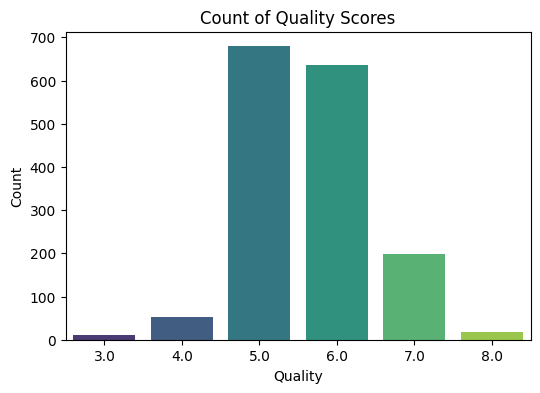

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Count of Quality Scores')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

**Quality Scores Distribution:**
- The majority of wines in the dataset received quality scores of 5.0 or 6.0.
- Fewer wines achieved scores of 3.0, 4.0, 7.0, and 8.0.
- There is a noticeable concentration around the average scores of 5.0 and 6.0.

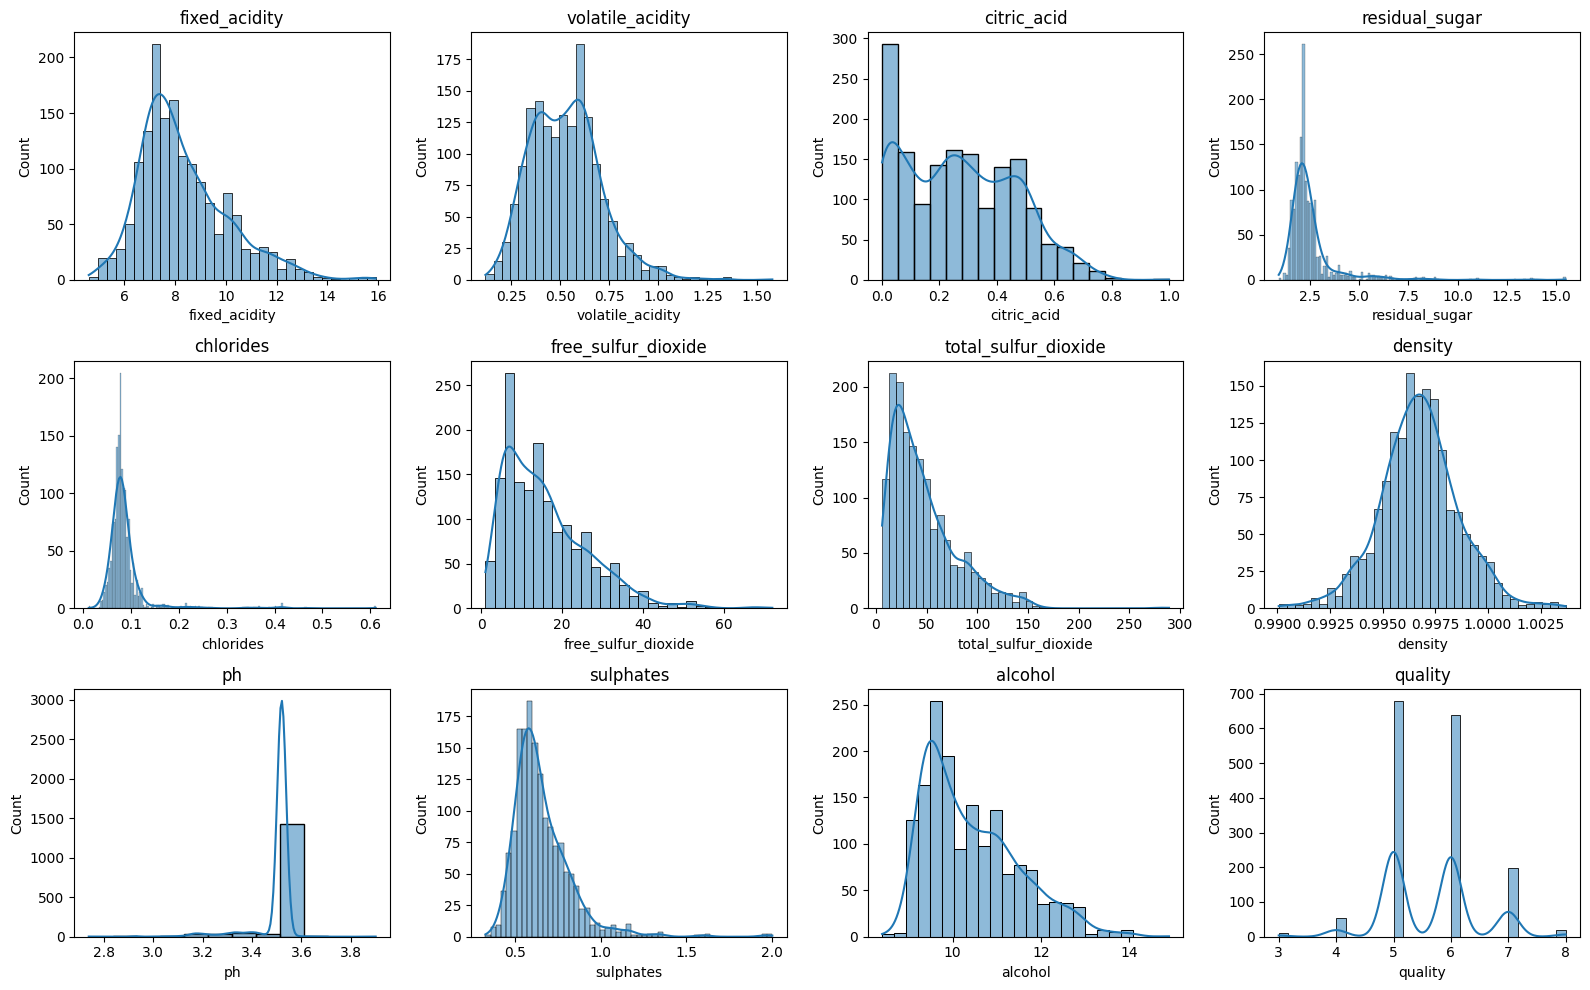

In [15]:
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

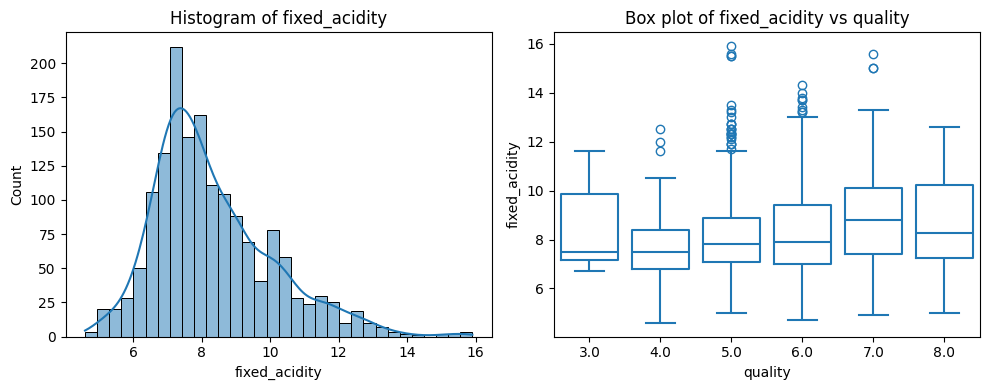

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['fixed_acidity'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of fixed_acidity')

sns.boxplot(x='quality', y='fixed_acidity', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of fixed_acidity vs quality')

plt.tight_layout()
plt.show()

- Histogram of Fixed Acidity:
    - Most wines have a fixed acidity level around 7 to 8.
    - The distribution is slightly right-skewed, indicating that there are more wines with lower fixed acidity.
    - The curve line over the bars suggests a normal distribution shape.
- Box Plot of Fixed Acidity vs. Quality:
    - As the quality rating increases from 3 to 8, there isn’t a significant change in the median fixed acidity levels.
    - In summary, while median fixed acidity remains relatively consistent, the spread of data widens as wine quality improves.

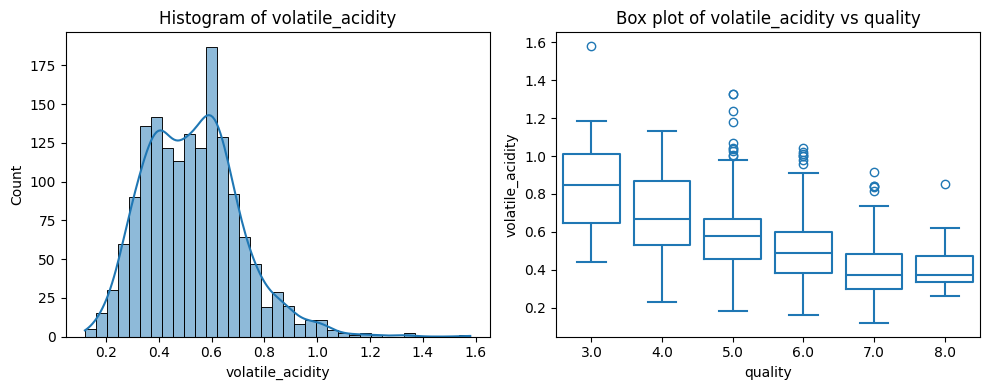

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['volatile_acidity'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of volatile_acidity')

sns.boxplot(x='quality', y='volatile_acidity', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of volatile_acidity vs quality')

plt.tight_layout()
plt.show()

- Histogram of Volatile Acidity:
    - Most wines have a volatile acidity level concentrated around 0.4 to 0.6.
    - The distribution appears to be approximately normal, and slightly right-skewed with a peak around 0.6.
- Box Plot of Volatile Acidity vs. Quality:
    - As the quality rating increases from 3 to 8, there is a significant change in the median volatile acidity levels is decresing.
    - In summary, while median volatile acidity remains relatively consistent, the spread of data widens as wine quality improves.

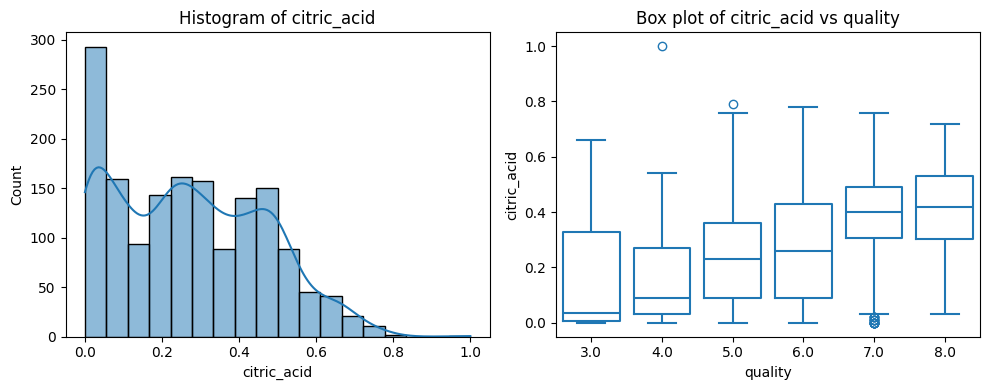

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['citric_acid'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of citric_acid')

sns.boxplot(x='quality', y='citric_acid', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of citric_acid vs quality')

plt.tight_layout()
plt.show()

- Histogram of Citric Acid:
    - Most items have low citric acid content, with a peak around 0.0 and another smaller peak near 0.3.
     - The distribution appears to be approximately normal, with a majority of data points clustered towards lower values.
- Box Plot of Citric Acid vs. Quality:
    - As the quality rating increases from 3 to 8, there is significant change in the median citric acid content also increase.
    - In summary, while median citric acid content remains relatively changing, the spread of data widens as wine quality improves.

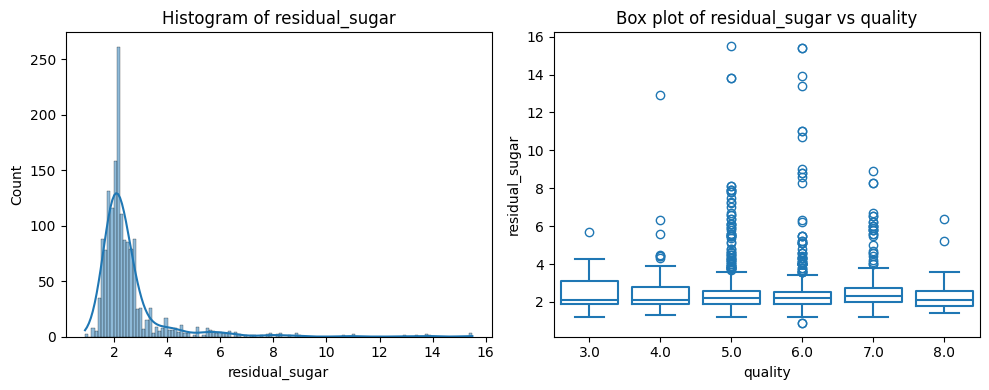

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['residual_sugar'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of residual_sugar')

sns.boxplot(x='quality', y='residual_sugar', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of residual_sugar vs quality')

plt.tight_layout()
plt.show()

- Histogram of Residual Sugar:
    - Most wines have a residual sugar content between 0 to 6.
    - There is a sharp peak around 2, indicating that a large number of wines have this specific residual sugar content.
    - Few wines have high residual sugar content as the frequency decreases sharply after 6.
- Box Plot of Residual Sugar vs. Quality:
    - As the quality rating increases from 3 to 8, there isn’t a significant change in the median residual sugar content.
    - In summary, while median residual sugar content remains relatively stable, the spread of data widens as wine quality improves.

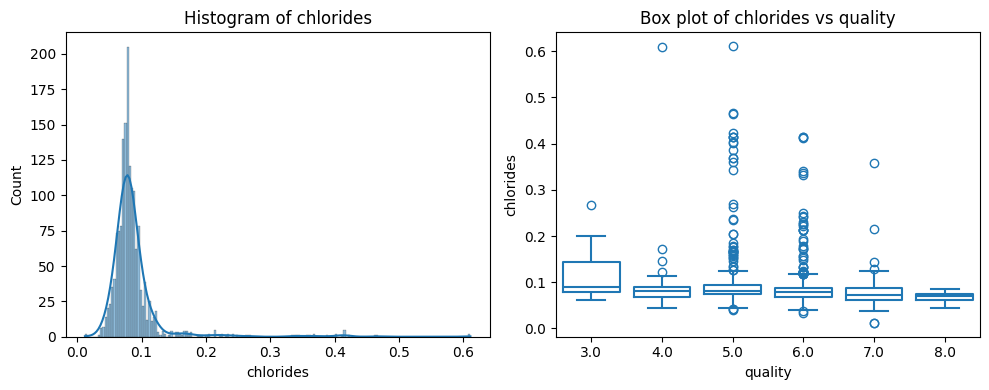

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['chlorides'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of chlorides')

sns.boxplot(x='quality', y='chlorides', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of chlorides vs quality')

plt.tight_layout()
plt.show()

- Histogram of Chlorides:
    - Most wines have a chloride content between 0.0 to 0.6.
    - There is a sharp peak around 0.1, suggesting that a significant number of wines have chloride content close to this value.
    - Few wines have high chloride content as the frequency decreases sharply after 0.6 and right-skewed with a peak around 0.1.
- Box Plot of Chlorides vs. Quality:
    - As the quality rating increases from 3 to 8, there isn’t a significant change in the median chloride content.
    - In summary, while median chloride content remains relatively stable, the spread of data widens as wine quality improves.

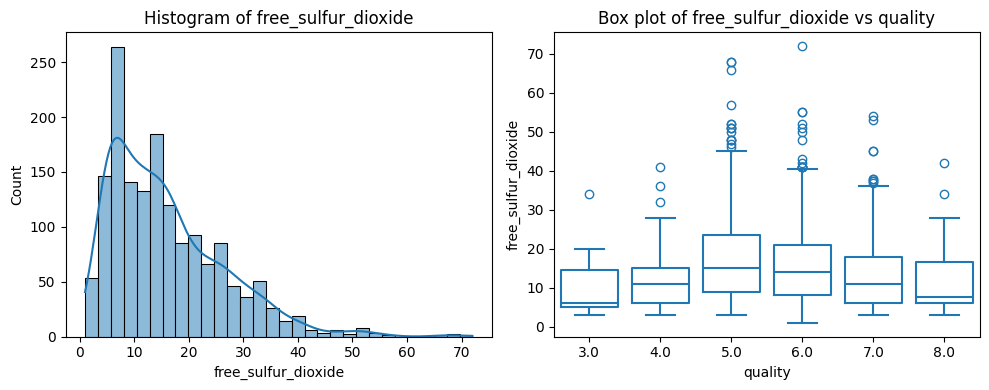

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['free_sulfur_dioxide'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of free_sulfur_dioxide')

sns.boxplot(x='quality', y='free_sulfur_dioxide', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of free_sulfur_dioxide vs quality')

plt.tight_layout()
plt.show()

- Histogram of Free Sulfur Dioxide:
    - Most wines have a free sulfur dioxide level between 0 and 20 mg/L.
    - There is a sharp peak around 2, indicating that a significant number of wines have this specific free sulfur dioxide content.
    - The distribution is right-skewed, meaning most data points are clustered towards lower levels.
- Box Plot of Free Sulfur Dioxide vs. Quality:
     - As the quality rating increases from 3 to 8, there isn’t a significant change in the median free sulfur dioxide content.
    - In summary, while median free sulfur dioxide content remains relatively stable, the spread of data widens as wine quality improves.

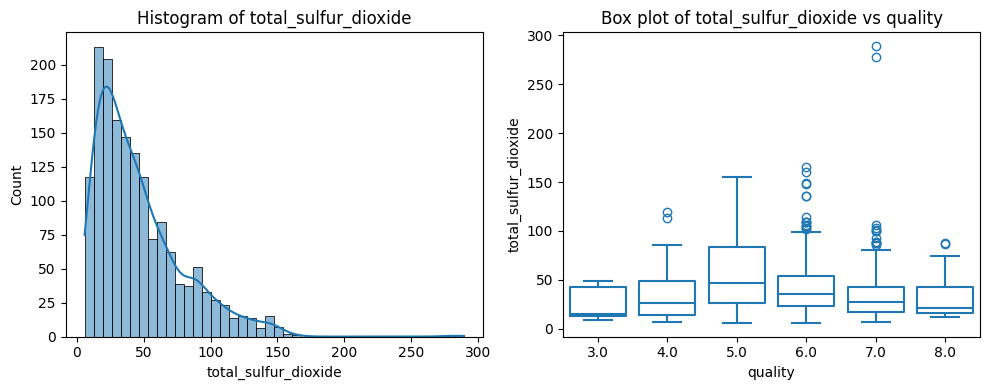

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['total_sulfur_dioxide'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of total_sulfur_dioxide')

sns.boxplot(x='quality', y='total_sulfur_dioxide', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of total_sulfur_dioxide vs quality')

plt.tight_layout()
plt.show()

- Histogram of Total Sulfur Dioxide:
    - Most wines have a total sulfur dioxide content between 0 to 100, with a peak around 25-50.
    - The right-skewed distribution indicates that wines with extremely high sulfur dioxide concentrations are less common.
- Box Plot of Total Sulfur Dioxide vs. Quality:
    - Lower-quality wines (ratings 3.0-6.0) tend to have a wider range and higher median total sulfur dioxide content.
    - In contrast, higher-quality wines (ratings 7.0 and above) exhibit lower medians and narrower interquartile ranges for total sulfur dioxide.
    - Notably, there are outliers in each quality category, especially among higher-quality wines. This suggests that some exceptional high-quality wines may still contain elevated levels of sulfur dioxide.

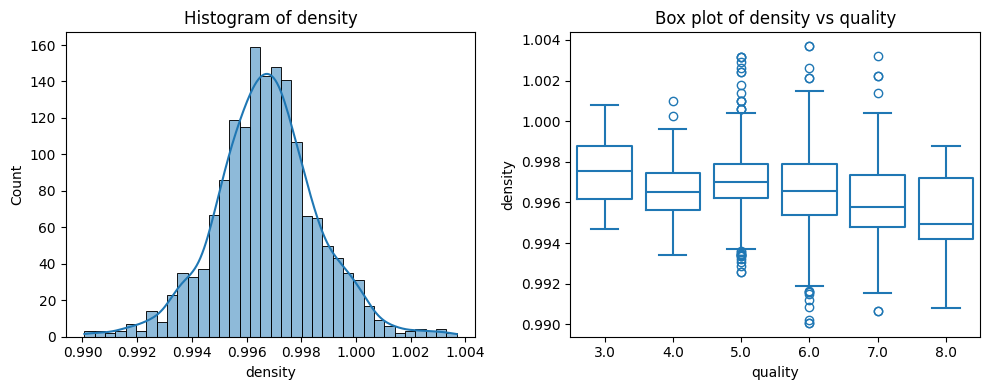

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['density'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of density')

sns.boxplot(x='quality', y='density', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of density vs quality')

plt.tight_layout()
plt.show()

- Histogram of Density:
    - Most wines have a density value clustering around 0.996.
    - The distribution appears to be relatively symmetric, with no pronounced skewness.
- Box Plot of Density vs. Quality:
    - Interestingly, there isn’t a significant change in density across various quality levels.
    - The median density remains relatively consistent for different wine qualities.
    - This suggests that density alone may not be a strong predictor of wine quality.

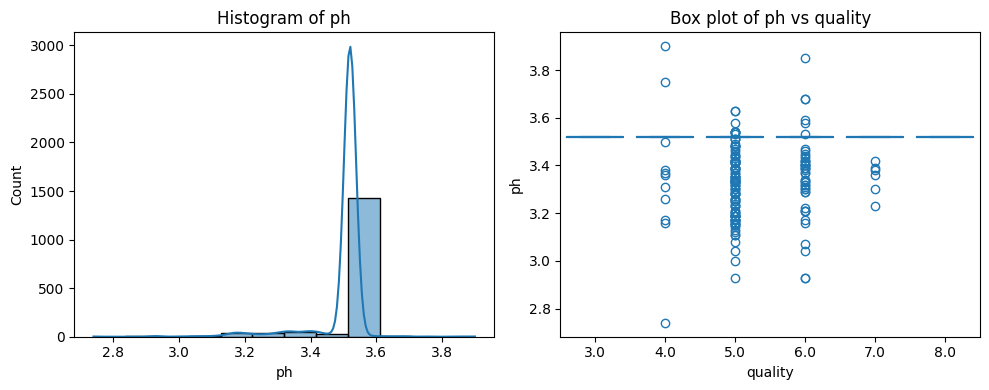

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['ph'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of ph')

sns.boxplot(x='quality', y='ph', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of ph vs quality')

plt.tight_layout()
plt.show()

- Histogram of pH:
    - Most wines have a pH value clustering around 3.3.
    -The prominent peak at this pH level indicates that it is a common acidity level in the dataset.
- Box Plot of pH vs. Quality:
    - Data points are scattered, and the medians for different quality levels are similar.
    - This suggests that pH alone may not be a strong predictor of wine quality.
    - Wines with different qualities exhibit similar median pH levels.

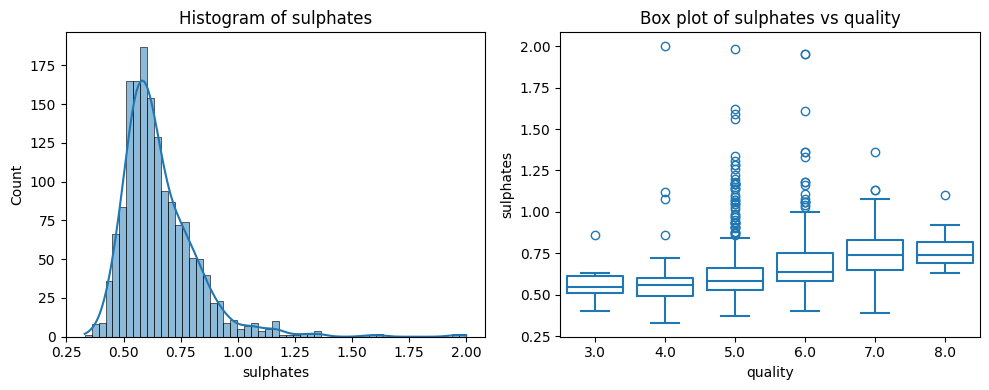

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['sulphates'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of sulphates')

sns.boxplot(x='quality', y='sulphates', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of sulphates vs quality')

plt.tight_layout()
plt.show()

- Histogram of Sulphates:
    - Most wines have sulphate levels ranging from approximately 0.5 to 1.0.
    - There’s a peak around 0.6, indicating that many samples have this specific sulphate concentration.
    - As the sulphate concentration increases beyond 1.0, fewer observations are noted.
- Box Plot of Sulphates vs. Quality:
    - An observable trend emerges where higher quality ratings (from 3 to 8) are associated with a wider range of sulphate levels.
    - Quality rating 5 exhibits the most varied distribution of sulphate concentrations, with numerous outliers.
    - Higher quality ratings (6 and above) tend to have slightly higher median sulphate concentrations compared to lower quality ratings.

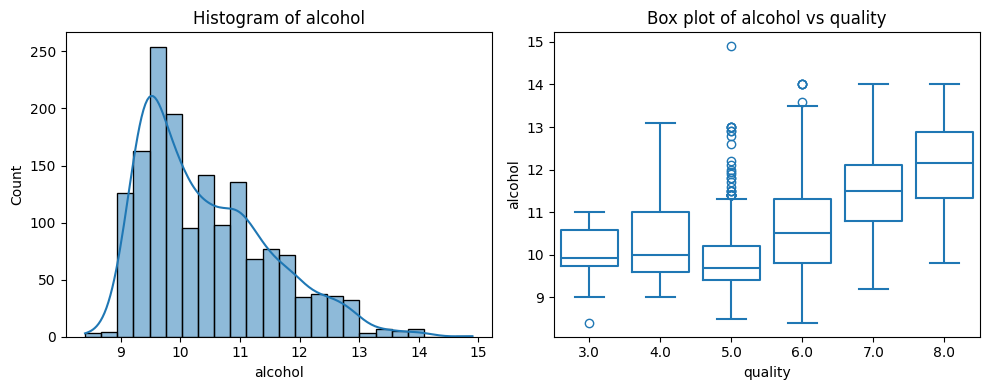

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['alcohol'], ax=ax[0],kde=True)
ax[0].set_title('Histogram of alcohol')

sns.boxplot(x='quality', y='alcohol', data=df, ax=ax[1],fill=False)
ax[1].set_title('Box plot of alcohol vs quality')

plt.tight_layout()
plt.show()

- Histogram of Alcohol Content:
    - Most wines have an alcohol content around 9-10%.
    - The peak around this range indicates that many samples fall within this specific alcohol concentration.
- Box Plot of Alcohol vs. Quality:
    - There’s a positive correlation between alcohol content and wine quality:
    - Higher quality wines tend to have higher alcohol content.
    - The median alcohol content increases as the quality rating improves.
    - This suggests that alcohol content is a relevant factor in determining wine quality.

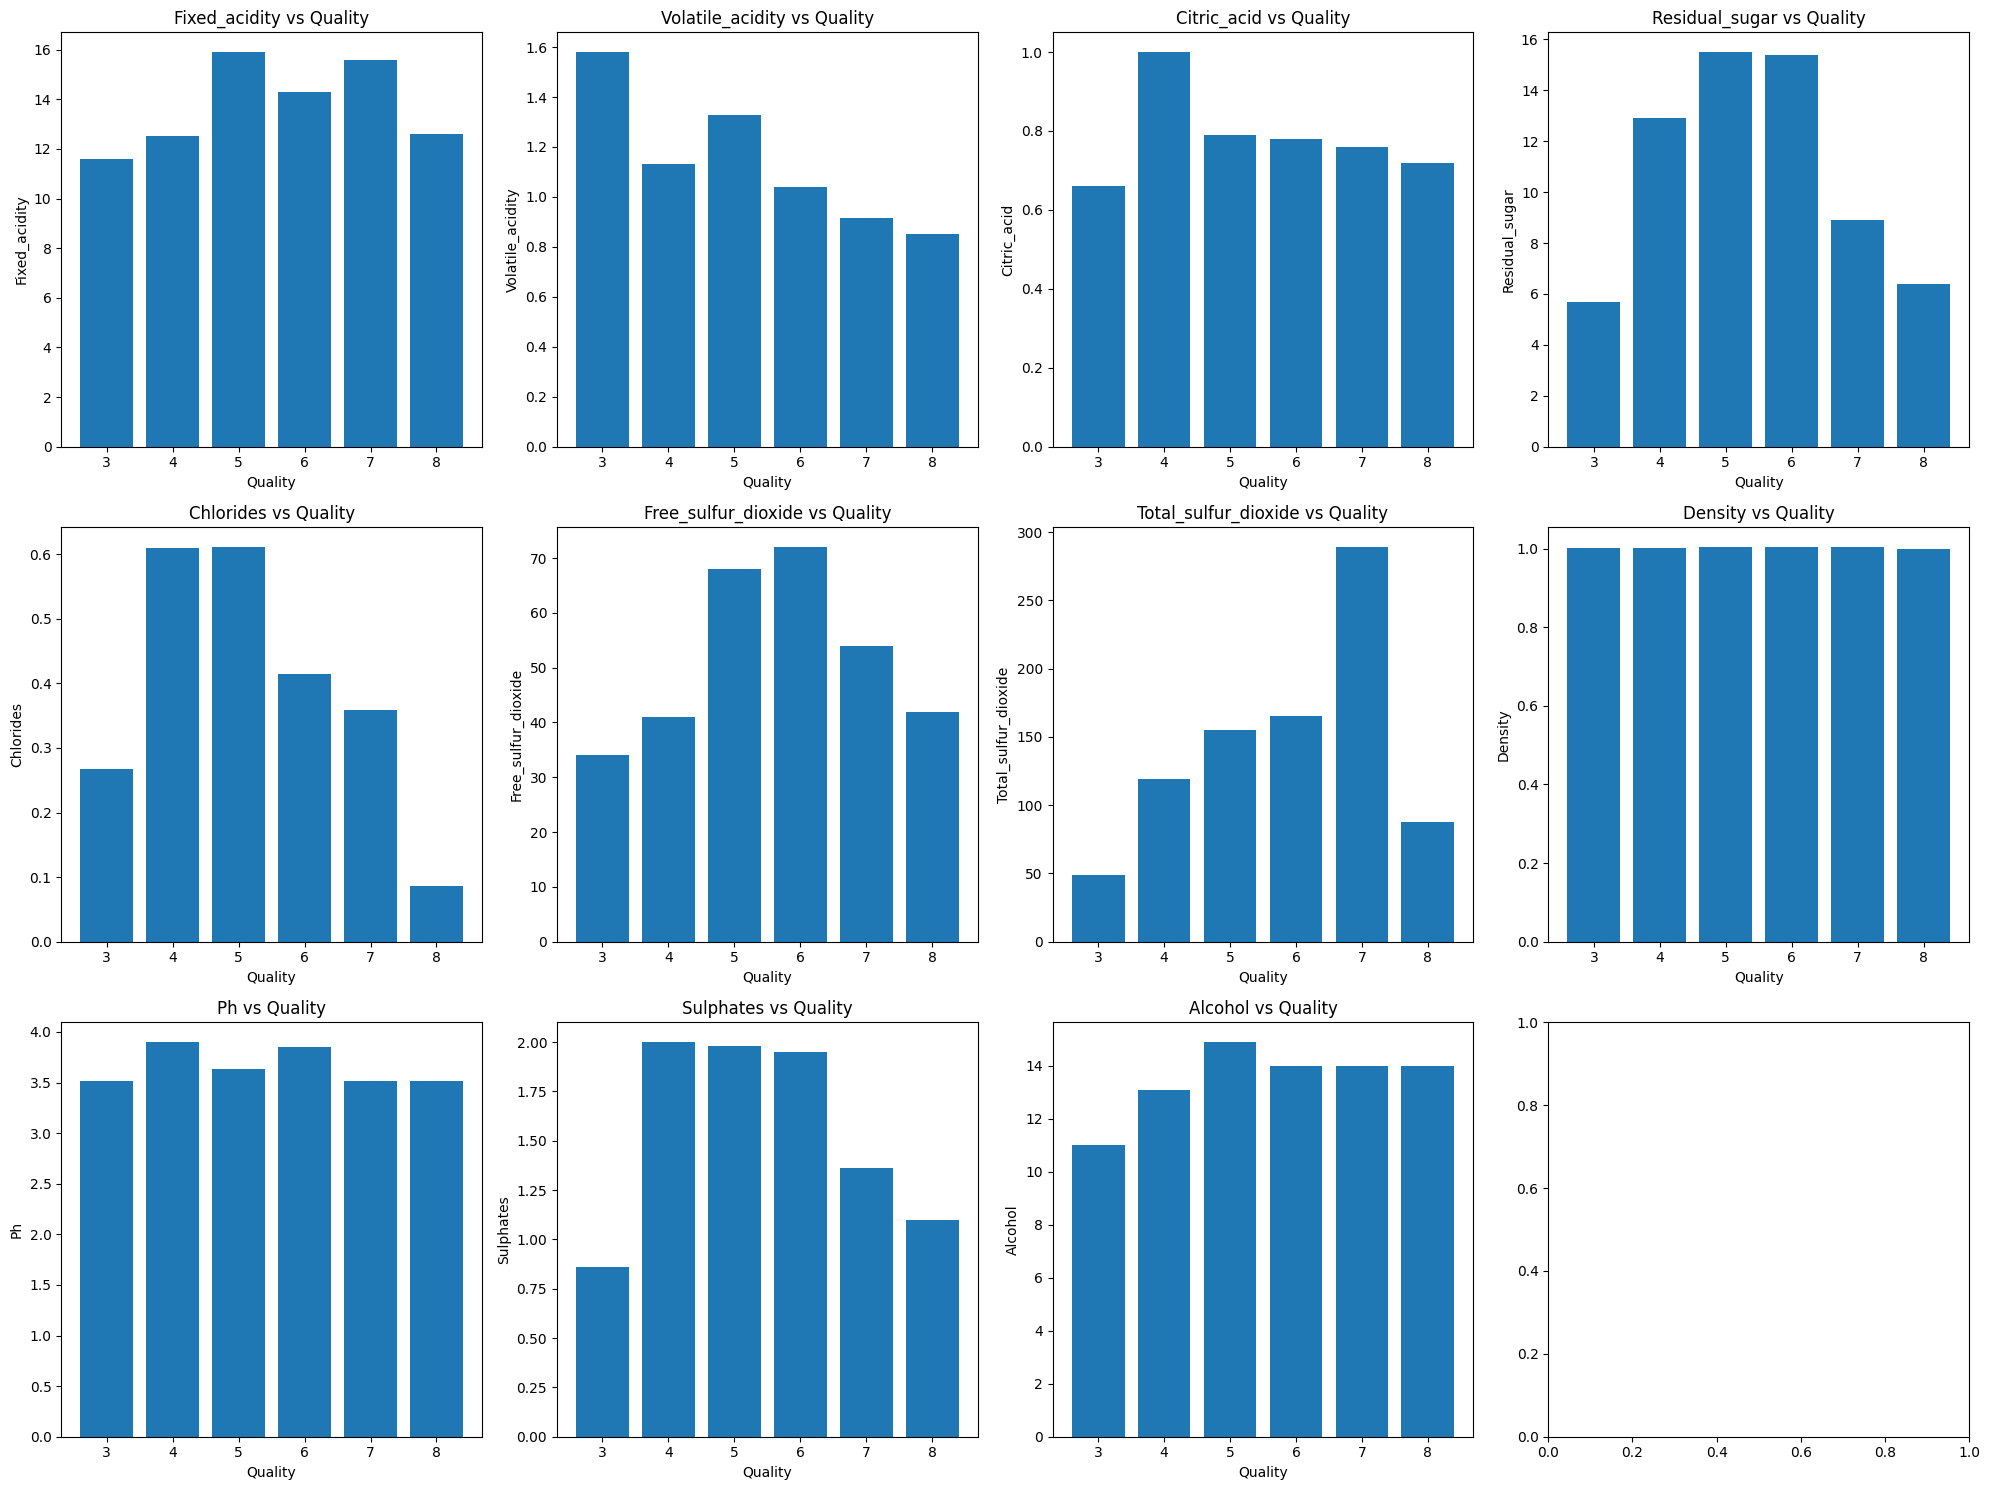

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(df.columns[:-1]):  
    axes[i].bar(df['quality'], df[column])
    axes[i].set_title(f'{column.capitalize()} vs Quality')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(column.capitalize())

plt.tight_layout()
plt.show()

- Fixed Acidity vs Quality:
    - There isn’t a clear trend; however, wines with a quality rating of 7 have slightly higher fixed acidity.
    - Fixed acidity alone may not be a strong predictor of wine quality.
- Volatile Acidity vs Quality:
    - Lower volatile acidity is associated with higher quality wines.
    - High volatile acidity can negatively impact wine taste and stability.
- Citric Acid vs Quality:
    - Higher quality wines tend to have more citric acid content.
    - Citric acid contributes to freshness and balance in wine.
- Residual Sugar vs Quality:
    - No distinct pattern; both low and high-quality wines have varied residual sugar levels.
    - Residual sugar affects wine sweetness.
- Chlorides vs Quality:
    - Lower chloride levels are common in higher quality wines.
    - Excessive chlorides can impart undesirable flavors.
- Free Sulfur Dioxide vs Quality:
    - No clear trend; various levels of free sulfur dioxide are present across all qualities.
    - Free sulfur dioxide acts as a preservative.
- Total Sulfur Dioxide vs Quality:
    - Wines rated 5 and 6 have higher total sulfur dioxide content.
    - Total sulfur dioxide affects wine stability.
- Density vs Quality:
    - Density doesn’t vary significantly across different wine qualities.
    - Density relates to wine body and alcohol content.
- pH vs Quality:
    - There’s no significant variation in pH levels across different wine qualities.
    - pH impacts wine taste and stability.

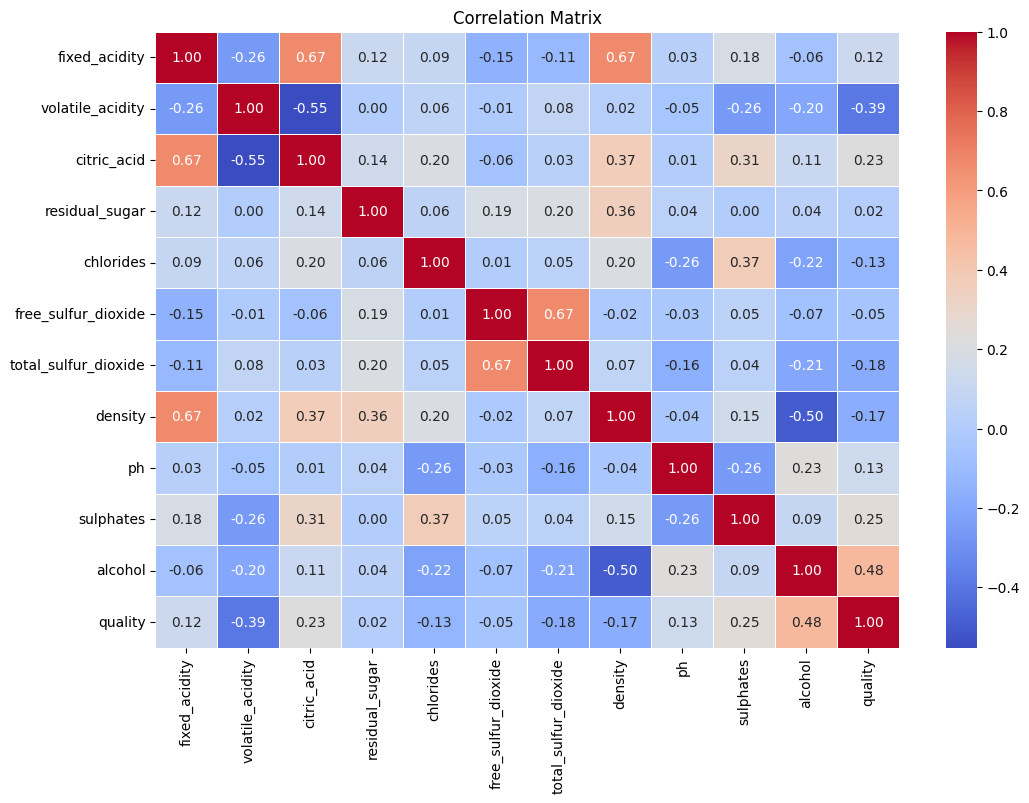

In [28]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

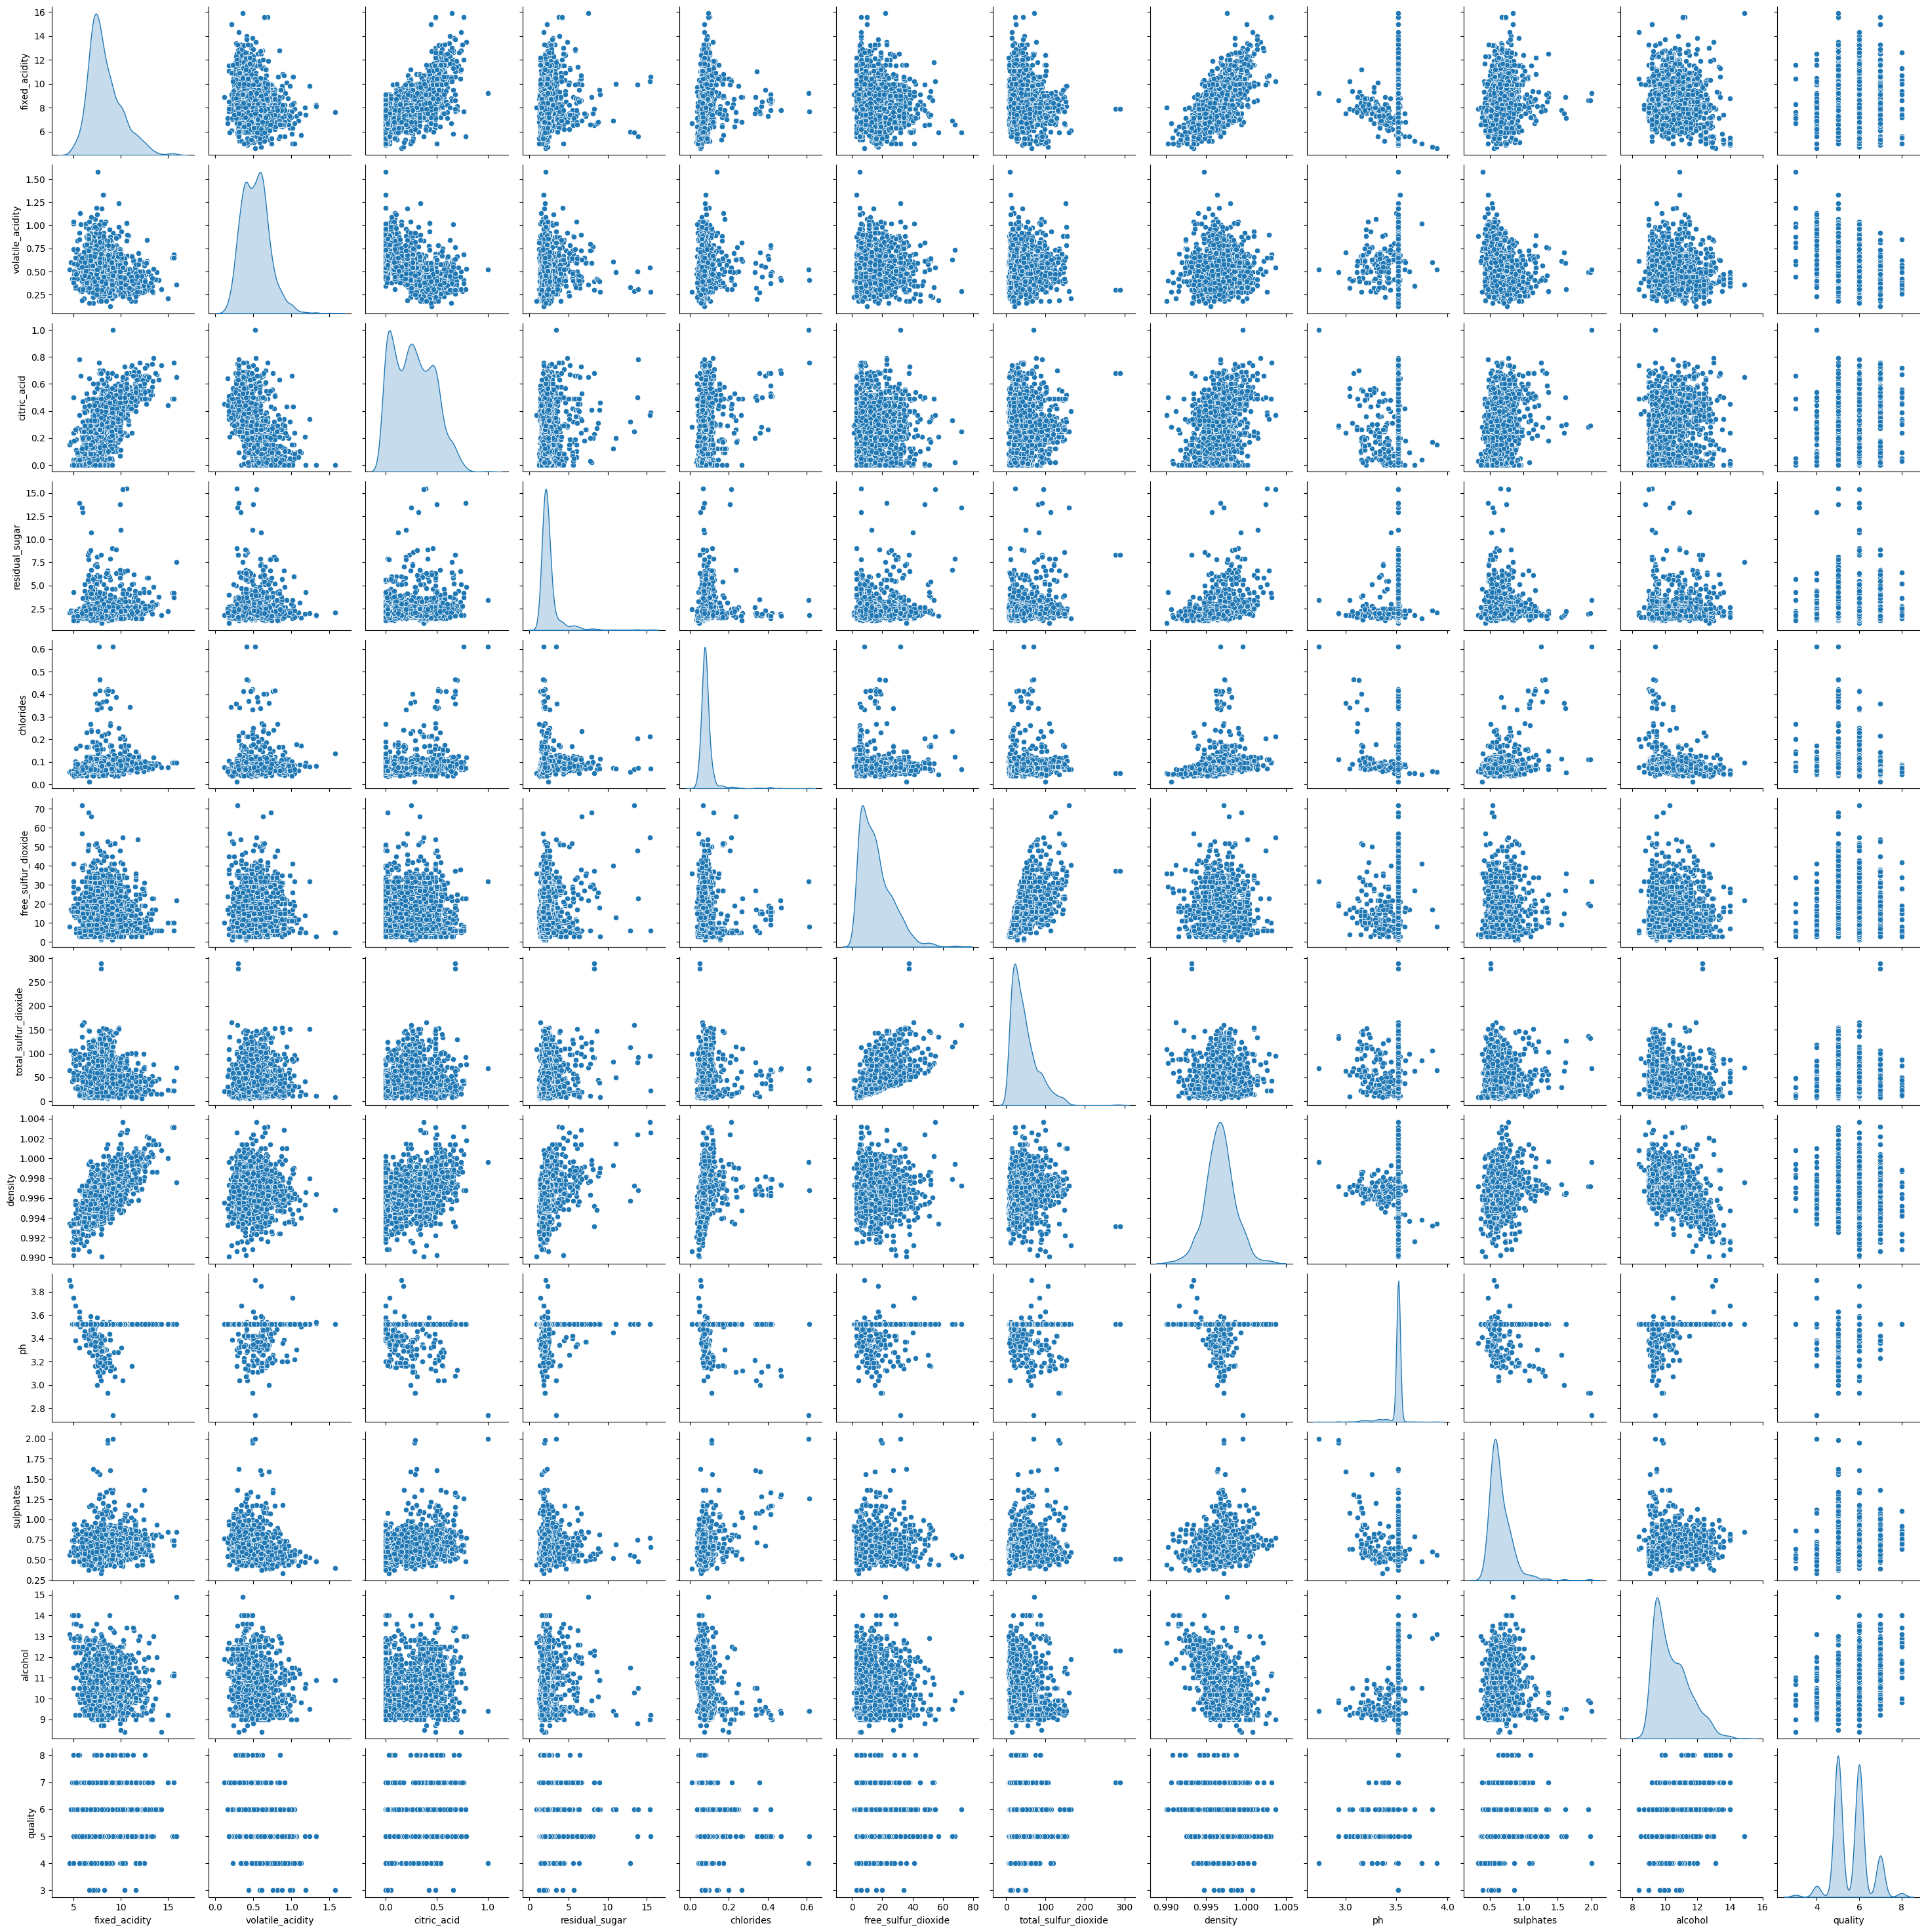

In [30]:
sns.pairplot(data = df, diag_kind='kde')

In [31]:
df['quality1'] = [1 if x>=7 else 0 for x in df['quality']]

In [32]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality1
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0


In [33]:
df['quality1'].value_counts()

quality1
0    1379
1     217
Name: count, dtype: int64

In [34]:
X=df.drop(['quality','quality1'],axis=1)
y=df['quality1']

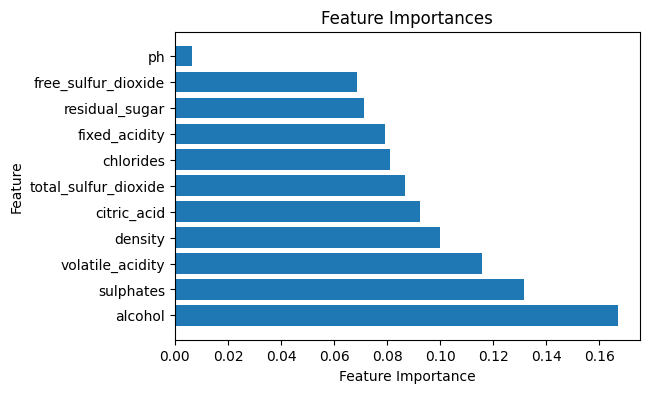

In [35]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]


plt.figure(figsize=(6, 4))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [36]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=2)

In [37]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((1276, 11), (320, 11), (1276,), (320,))

In [38]:
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(Xtrain, ytrain)

In [39]:
Xtrain.shape, ytrain.shape

((1276, 11), (1276,))

In [40]:
pipelines = {
    'logistic_regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
    'svc': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ]),
    'decision_tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ])
}

param_grids = {
    'logistic_regression': [
        {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'svc': [
        {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
            'classifier__kernel': ['rbf'], 
            'classifier__C': [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
            'classifier__kernel': ['poly'], 
            'classifier__degree': [2, 3, 4, 5], 
            'classifier__C': [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
            'classifier__kernel': ['linear'], 
            'classifier__C': [0.1, 0.01, 1, 10, 100]
        }
    ],
    'decision_tree': [
        {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
        }
    ]
}

In [41]:
best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(
        estimator=pipelines[algo],
        param_grid=param_grids[algo],
        cv=5,
        scoring='accuracy',
        return_train_score=True,
        verbose=1
    )
    grid_search.fit(X_train_resampled, y_train_resampled)
    print('Train Score:', grid_search.best_score_)
    print('Test Score:', grid_search.score(Xtest, ytest))
    best_models[algo] = grid_search.best_estimator_
    print()

********** logistic_regression **********
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Train Score: 0.8129588014981273
Test Score: 0.79375

********** random_forest **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Score: 0.9384057090798665
Test Score: 0.88125

********** svc **********
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Train Score: 0.9460431217734587
Test Score: 0.846875

********** decision_tree **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Score: 0.8902955764753517
Test Score: 0.84375

********** naive_bayes **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train Score: 0.7778864257515943
Test Score: 0.63125

